# **Proyecto Final**
---

## **Análisis y Procesamiento Inteligente de Textos**


## Integrantes

### - Domínguez Fuentes Luis Mario

### - Rios Nuñez Huberto


### Semestre 2023-2



In [1]:
#bibliotecas utilizadas para extraer, limpiar y manipular los datos
from py_scripts.helpers import *
import pandas as pd 
import numpy as np
import seaborn as sns
import gensim


from gensim import corpora
from gensim.corpora.dictionary import Dictionary

 
# Para trazar los graficos
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.show('seaborn')

#biblioteca utilizada para contar la frecuencia de las palabras
from sklearn.feature_extraction.text import CountVectorizer

#Para crear el modelo de análisis de sentimiento, tokenización y lematización
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Variables locales 
from dotenv import dotenv_values

config = dotenv_values(".env")



Extraemos la información de las 50 canciones más populares del artista usando la función creada en el script de ayudantes

In [2]:
artist = 'Tears for Fears'
access_token = config["GENIUS_ACCESS_TOKEN"]
df0 = search_data(artist, 50, access_token)

Searching for songs by Tears for Fears...

Song 1: "Everybody Wants to Rule the World"
Song 2: "Mad World"
Song 3: "Head Over Heels/Broken (Reprise)"
Song 4: "Shout"
Song 5: "Sowing the Seeds of Love"
Song 6: "Woman in Chains"
Song 7: "Pale Shelter"
Song 8: "Head Over Heels"
Song 9: "The Working Hour"
Song 10: "Memories Fade"
Song 11: "Listen"
Song 12: "Break It Down Again"
Song 13: "Watch Me Bleed"
Song 14: "I Love You But I’m Lost"
Song 15: "Mothers Talk"
Song 16: "Advice for the Young at Heart"
Song 17: "I Believe"
Song 18: "Change"
Song 19: "Broken"
Song 20: "The Hurting"
Song 21: "Ideas as Opiates"
Song 22: "The Tipping Point"
Song 23: "Bad Man’s Song"
Song 24: "Goodnight Song"
Song 25: "Suffer the Children"
Song 26: "Famous Last Words"
Song 27: "Pharaohs"
Song 28: "Raoul and the Kings of Spain"
Song 29: "Elemental"
Song 30: "Long, Long, Long Time"
Song 31: "No Small Thing"
Song 32: "Rivers of Mercy"
Song 33: "Stay"
Song 34: "Break the Man"
Song 35: "Everybody Wants to Run the Wor

Mostramos  la información de las 10 mejores canciones del artista, el titulo, la fecha y la letra

In [3]:
df0.head(10)

,artist,title,date,lyric
0,Tears for Fears,Everybody Wants to Rule the World,1985,115 ContributorsTranslationsPolskiFrançaisEver...
1,Tears for Fears,Mad World,1983,38 ContributorsMad World Lyrics[Verse 1]\nAll ...
2,Tears for Fears,Head Over Heels/Broken (Reprise),1950,49 ContributorsHead Over Heels/Broken (Reprise...
3,Tears for Fears,Shout,1985,39 ContributorsShout Lyrics[Chorus: Roland Orz...
4,Tears for Fears,Sowing the Seeds of Love,1989,36 ContributorsSowing the Seeds of Love Lyrics...
5,Tears for Fears,Woman in Chains,1989,19 ContributorsWoman in Chains Lyrics[Verse 1:...
6,Tears for Fears,Pale Shelter,1983,17 ContributorsPale Shelter Lyrics[Verse 1: Cu...
7,Tears for Fears,Head Over Heels,1985,13 ContributorsHead Over Heels Lyrics[Verse 1:...
8,Tears for Fears,The Working Hour,1985,19 ContributorsThe Working Hour Lyrics[Verse 1...
9,Tears for Fears,Memories Fade,1983,15 ContributorsMemories Fade Lyrics[Verse 1]\n...


Limpiamos y transformamos los datos usando funciones creadas en el script de ayudantes

In [4]:

df = clean_lyrics(df0,'lyric')
df = create_decades(df)

d:\Users\oiram\Desktop\ProyectoAyPIT\py_scripts\helpers.py:79: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace(
d:\Users\oiram\Desktop\ProyectoAyPIT\py_scripts\helpers.py:80: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  r"verse |[1|2|3]|chorus|bridge|outro", "").str.replace("[", "").str.replace("]", "")
d:\Users\oiram\Desktop\ProyectoAyPIT\py_scripts\helpers.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.lower().str.replace(
d:\Users\oiram\Desktop\ProyectoAyPIT\py_scripts\helpers.py:83: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column] = df[column].str.replace("\n", " ").str.replace(


Filtramos las canciones para excluir los instrumentales, en caso de existir. 

In [5]:
df = df[df['lyric'].notnull()]

Guaramos la informacion en un archivo csv dentro de la carpeta datos.

In [6]:
df.to_csv(f'data/lyrics_{artist}.csv',index=False)

Mostramos las 50 canciones agregando la columna 'decade'

In [7]:
df[['artist', 'title', 'decade', 'date']]

,artist,title,decade,date
0,Tears for Fears,Everybody Wants to Rule the World,80s,1985
1,Tears for Fears,Mad World,80s,1983
2,Tears for Fears,Head Over Heels/Broken (Reprise),50s,1950
3,Tears for Fears,Shout,80s,1985
4,Tears for Fears,Sowing the Seeds of Love,80s,1989
5,Tears for Fears,Woman in Chains,80s,1989
6,Tears for Fears,Pale Shelter,80s,1983
7,Tears for Fears,Head Over Heels,80s,1985
8,Tears for Fears,The Working Hour,80s,1985
9,Tears for Fears,Memories Fade,80s,1983


Creamos una función para filtrar las palabras únicas de cada canción

In [8]:
def unique(list1): 
     # Se inicializa una lista vacia
    unique_list = [] 
      
    # iteramos por todos los elementos
    for x in list1: 
        # comprobamos si existe en unique_list o no
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

Almacenamos las palabras únicas de cada canción en una nueva columna llamada 'words'

In [9]:
#lista utilizada para almacenar las palabras
words = []
#iteramos sobre las palabras de las letras y guardamos los valore únicos
df = df.reset_index(drop=True)
for word in df['lyric'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#creamos la nueva columna con la información de las listas de palabras
df['words'] = words

Mostramos la información

In [10]:
df[['title', 'words']].head(10)

,title,words
0,Everybody Wants to Rule the World,"[5, stranslationspolskifrançaiseverybody, want..."
1,Mad World,"[8, smad, world, lyric, around, familiar, face..."
2,Head Over Heels/Broken (Reprise),"[49, shead, heelsbroken, reprise, lyric, rolan..."
3,Shout,"[9, sshout, lyric, roland, orzabal, curt, smit..."
4,Sowing the Seeds of Love,"[6, ssowing, seed, love, lyric, roland, orzaba..."
5,Woman in Chains,"[9, swoman, chain, lyric, roland, orzabal, bet..."
6,Pale Shelter,"[7, spale, shelter, lyric, curt, smith, sure, ..."
7,Head Over Heels,"[shead, heel, lyric, roland, orzabal, wanted, ..."
8,The Working Hour,"[9, sthe, working, hour, lyric, thing, ive, to..."
9,Memories Fade,"[5, smemories, fade, lyric, there, need, love,..."


Se crea un nuevo dataframe de todas las palabras utilizadas en las canciones y sus décadas.

In [11]:
#Lista utilizada para almacenar la información
set_words = []
set_decades = []

#Iteramos a través de cada palabra y década y almacenarlos en las nuevas listas
for i in df.index:
    for word in df['words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df['decade'].iloc[i])

#Creamos el nuevo marco de datos con la información de las listas de palabras y décadas
words_df = pd.DataFrame({'words':set_words,'decade':set_decades})

Definimos sus propias palabras vacías en caso de que la función de limpieza de datos no las haya eliminado.

In [12]:
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo",
               "yeah", "also", "like", "lyric", "contributors", "might", 
               "interlude","roland", "orzabal", "interlude", "embed" ]

Contamos la frecuencia de cada palabra que no aparece en la lista de stop_words

In [13]:
cv = CountVectorizer(stop_words=stop_words)

Se crea un dataframe llamado data_cv para almacenar la frecuencia de las palabras de acuero a su decada.


In [14]:
text_cv = cv.fit_transform(words_df['words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names_out())
data_cv['decade'] = words_df['decade']

Se crea un datafram que suma la frecuencia  de cada palabra y agrupa el resultado por década


In [15]:
vect_words = data_cv.groupby('decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

Se guarda la informacion en un archivo csv

In [16]:
vect_words.to_csv(f'data/words_{artist}.csv',index=False)

In [17]:
#Se cambia el orden de las columnas para ordenar de la década más antigua a la actual
vect_words = vect_words[['words','80s','90s','00s','10s']]

Se muestran los resultados

In [18]:
vect_words

,words,80s,90s,00s,10s
0,00,1,0,0,0
1,49,0,0,0,0
2,68,1,0,0,0
3,about5,1,0,0,0
4,absurd,1,0,0,0
...,...,...,...,...,...
1352,yes,1,1,0,0
1353,yesterday,1,0,0,1
1354,you0,1,0,0,0
1355,young,4,0,0,2


## Funciones Auxiliares: Gráficas

Se usa para mostrar en un grafico las palabras mas usadas por decada

In [19]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


Determina la frecuencia de las palabras mas usadas

In [20]:
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['decade'][main_df['decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data


Grafica las palabras más usadas en las canciones de la decada solicitada

In [21]:

def plot_freq_words(df,decade,n_words):
    
    top_words = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words['words'],top_words[df.columns[1]])
    plt.plot(top_words['words'],top_words[df.columns[2]])
    plt.plot(top_words['words'],top_words[df.columns[3]])
    plt.plot(top_words['words'],top_words[df.columns[4]])

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Palabras más frecuentes de la decada de los {decade} comparadas con otras decadas",fontsize=14)
    plt.xlabel(f"Palabras más frecuentes de los {decade}",fontsize=12)
    plt.ylabel('Frecuencia',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig(f"figures/lineplot_{artist}_decade_{decade}.png",format="png", bbox_inches='tight')
    plt.show()

Muestra las estadisticas de las palabras

In [22]:
words_stats(vect_words,df)

,decade,unique words,total words,total songs,words per songs
0,80s,917,1649,30,55
1,90s,354,414,6,69
2,00s,38,38,1,38
3,10s,505,669,11,61


Mostramos el gráfico comparando las 4 decadas

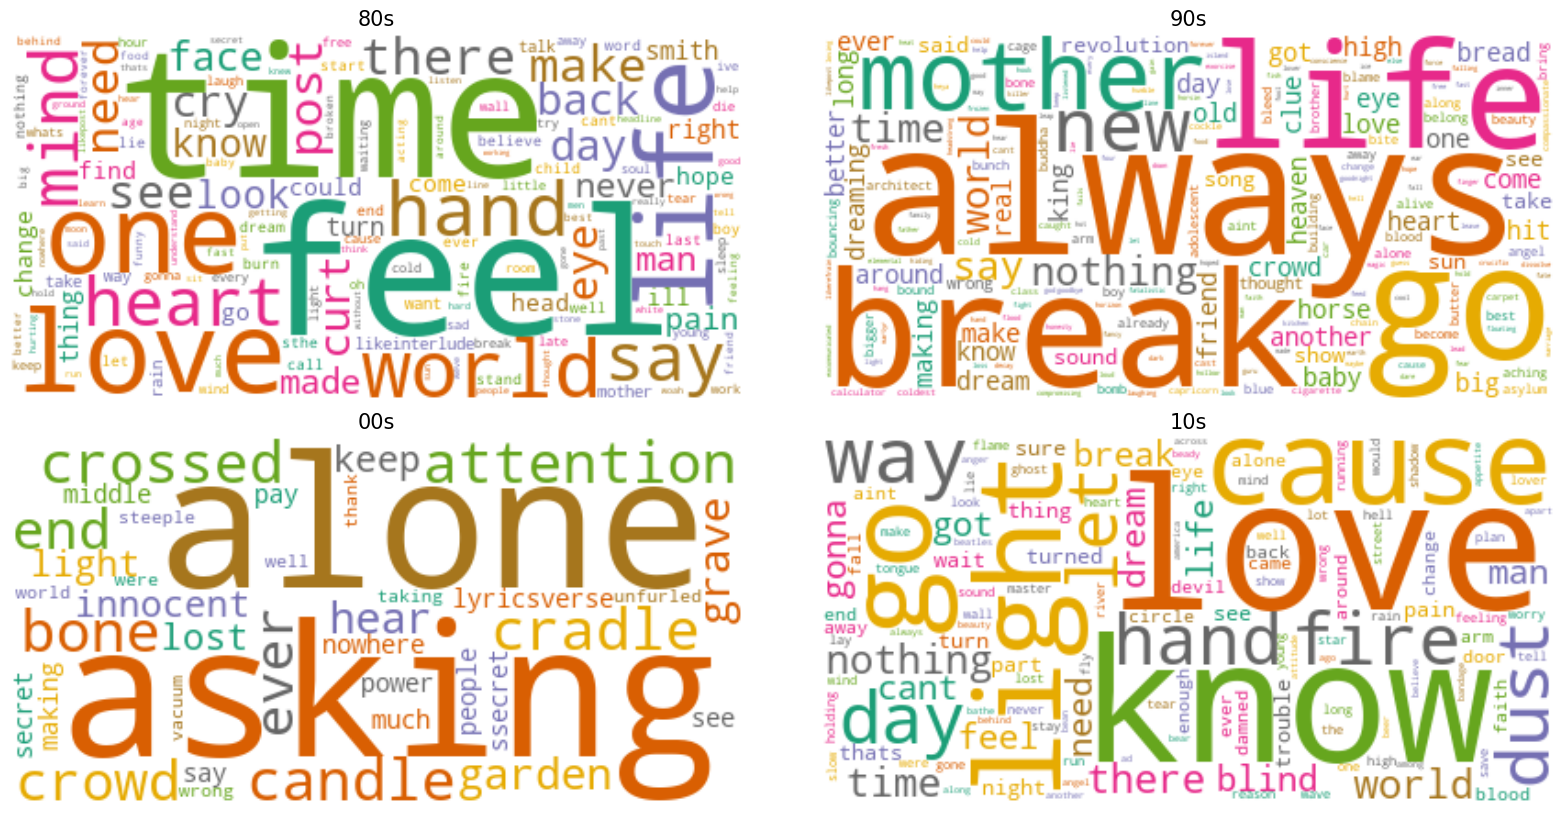

In [23]:

plot_wordcloud(vect_words,2,2)

Mostramos la gráfica de las palabras más comunes de la decada comparandolas con su aparición en el resto de las decadas.

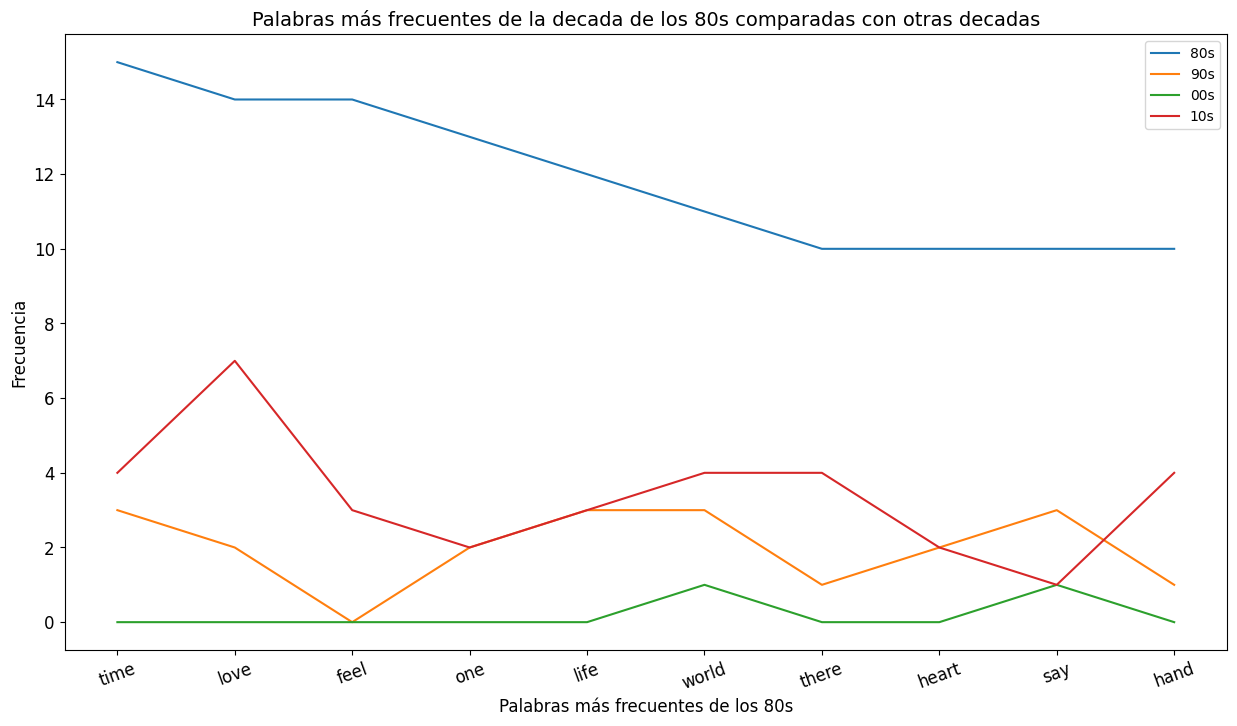

In [24]:

plot_freq_words(vect_words,'80s',10)

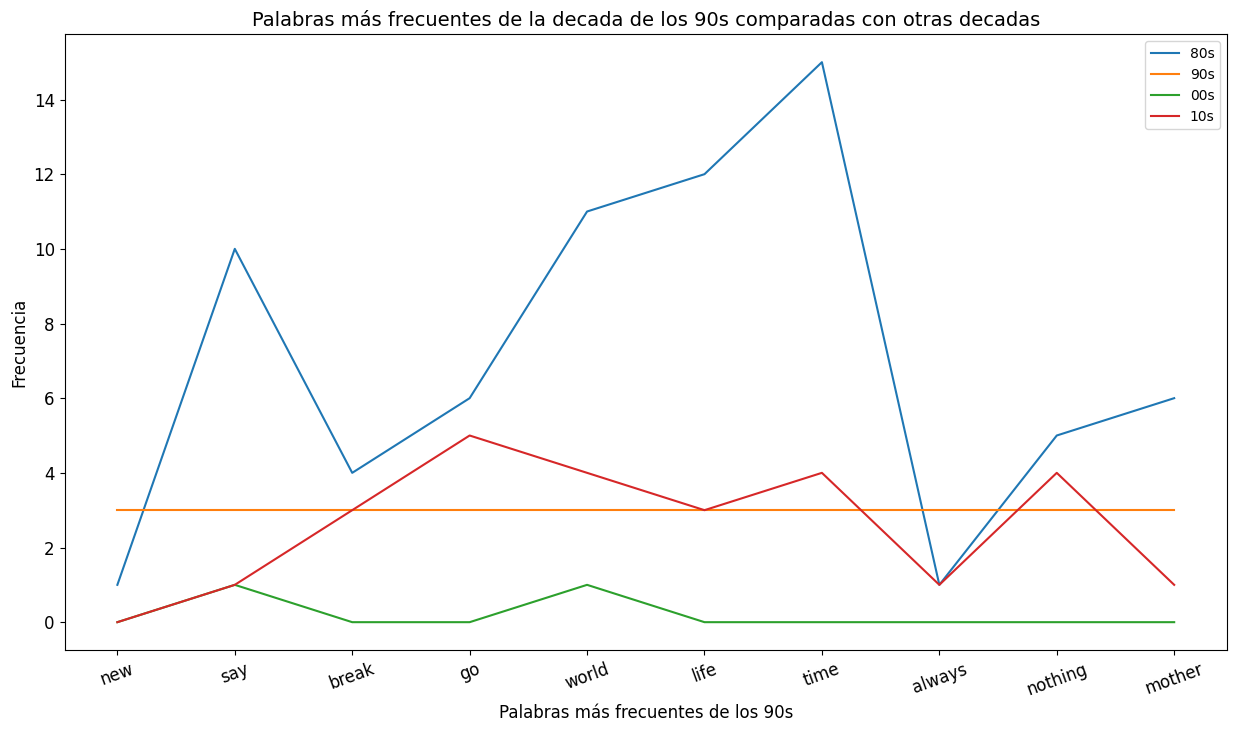

In [25]:
plot_freq_words(vect_words,'90s',10)

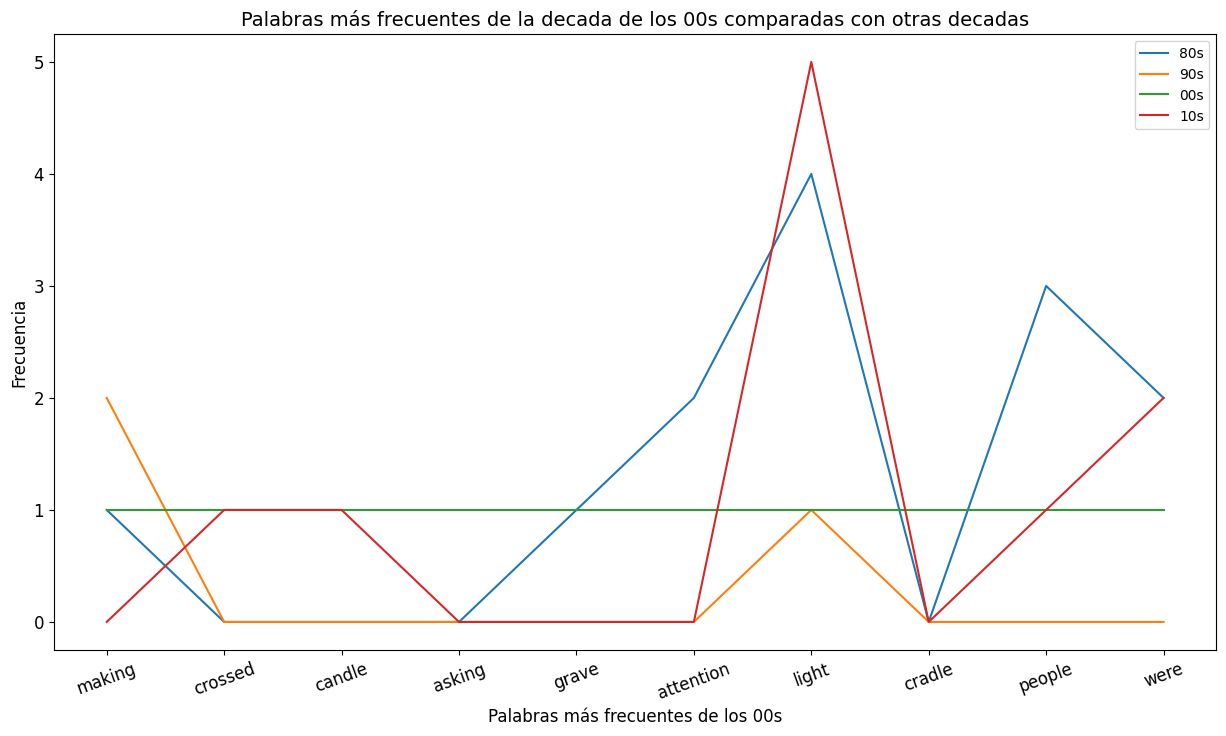

In [26]:
plot_freq_words(vect_words,'00s',10)

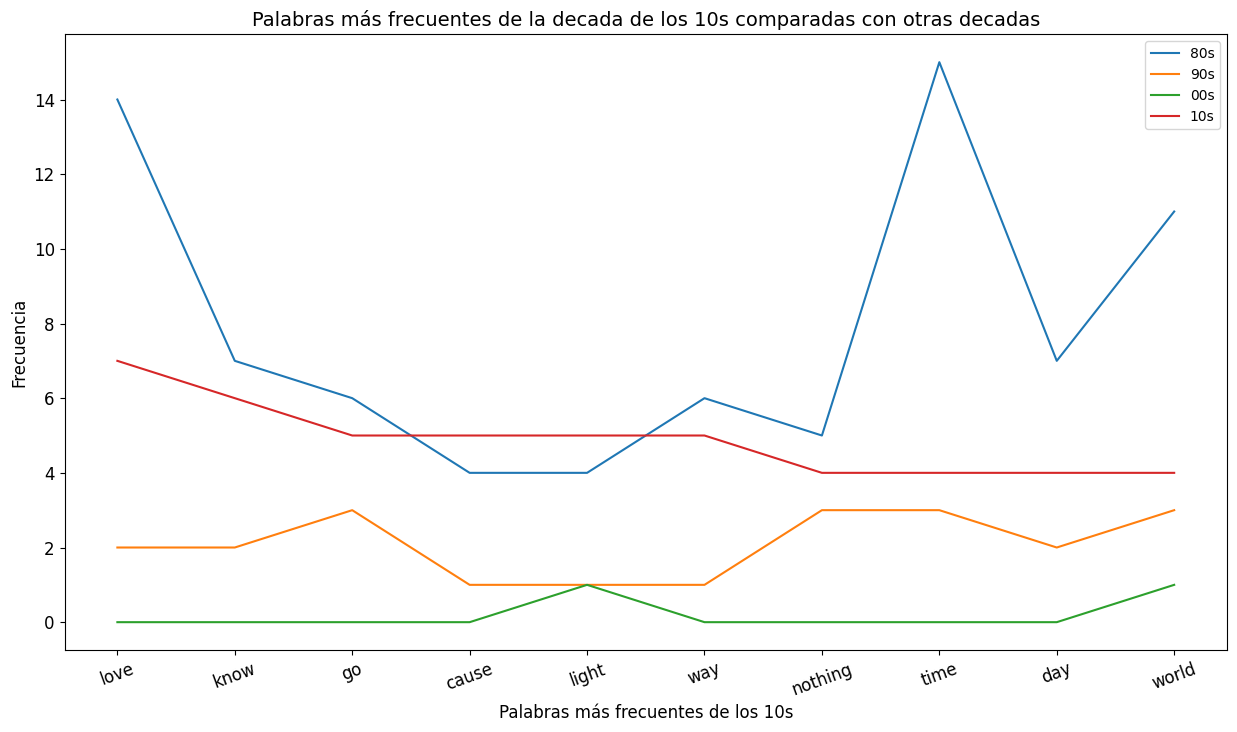

In [27]:
plot_freq_words(vect_words,'10s',10)

Función que muestra las palabras más comunes utilizadas por década

In [28]:
def unique_decade_words(df,decade,n_words):
    periods = []
    unique_words = []
    top_words = df.sort_values([decade],ascending=False).head(n_words).reset_index(drop=True)

    for d in top_words.columns[1:]:
        if d != decade:
            periods.append(d)

    for i in top_words.index:
        if top_words[periods[0]].iloc[i]<top_words[decade].min():
            if top_words[periods[1]].iloc[i]<top_words[decade].min():
                if top_words[periods[2]].iloc[i]<top_words[decade].min():
                    unique_words.append(top_words['words'].iloc[i])
    return unique_words

Mostramos las primeras 10 palabras únicas de la decada

In [29]:
unique_decade_words(vect_words,'80s',10)

['time',
 'love',
 'feel',
 'one',
 'life',
 'world',
 'there',
 'heart',
 'say',
 'hand']

In [30]:
unique_decade_words(vect_words,'90s',10)

['new', 'always']

In [31]:
unique_decade_words(vect_words,'00s',10)

['asking', 'cradle']

In [32]:
unique_decade_words(vect_words,'10s',10)

[]

## Análisis de sentimiento utilizando el modelo VADER

In [79]:
#Crea listas para almacenar las diferentes puntuaciones de cada palabra
negative = []
neutral = []
positive = []
compound = []

#Inicializa el modelo
sid = SentimentIntensityAnalyzer()

#Iterar sobre cada fila de letras y agregar las puntuaciones
for i in df.index:
    scores = sid.polarity_scores(df['lyric'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

#Crea 4 columnas en el marco de datos principal para cada puntaje
df['vader_negative'] = negative
df['vader_neutral'] = neutral
df['vader_positive'] = positive
df['vader_compound'] = compound

Muestra el puntaje de cuales son la palabras negativas, positvas, netruales y el combinado

In [80]:

df[['title', 'decade', 'vader_negative', 'vader_positive', 'vader_neutral', 'vader_compound']].head()

,title,decade,vader_negative,vader_positive,vader_neutral,vader_compound
0,Everybody Wants to Rule the World,80s,0.062,0.183,0.755,0.9793
1,Mad World,80s,0.242,0.135,0.622,-0.9864
2,Head Over Heels/Broken (Reprise),50s,0.093,0.069,0.838,-0.6885
3,Shout,80s,0.018,0.087,0.896,0.9869
4,Sowing the Seeds of Love,80s,0.035,0.315,0.650,0.9998


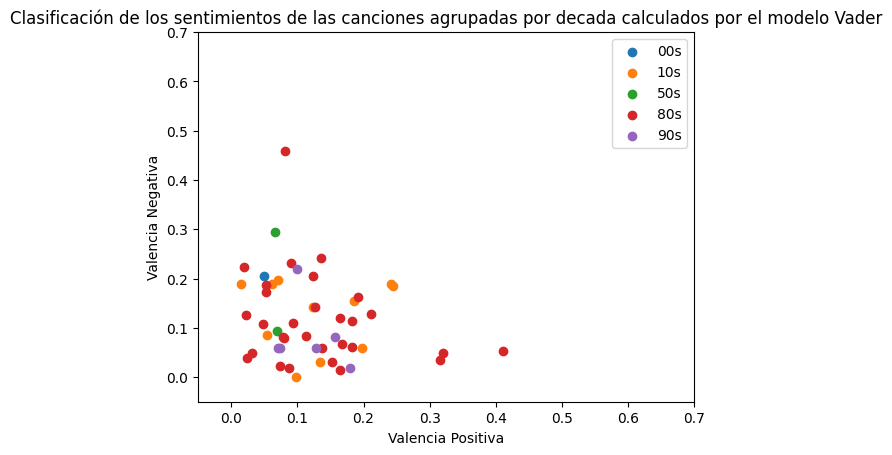

In [82]:
for name, group in df.groupby('decade'):
    plt.scatter(group['vader_positive'],group['vader_negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Clasificación de los sentimientos de las canciones agrupadas por decada calculados por el modelo Vader")
plt.xlabel('Valencia Positiva')
plt.ylabel('Valencia Negativa')
plt.show()

Text(0, 0.5, 'Decadas')

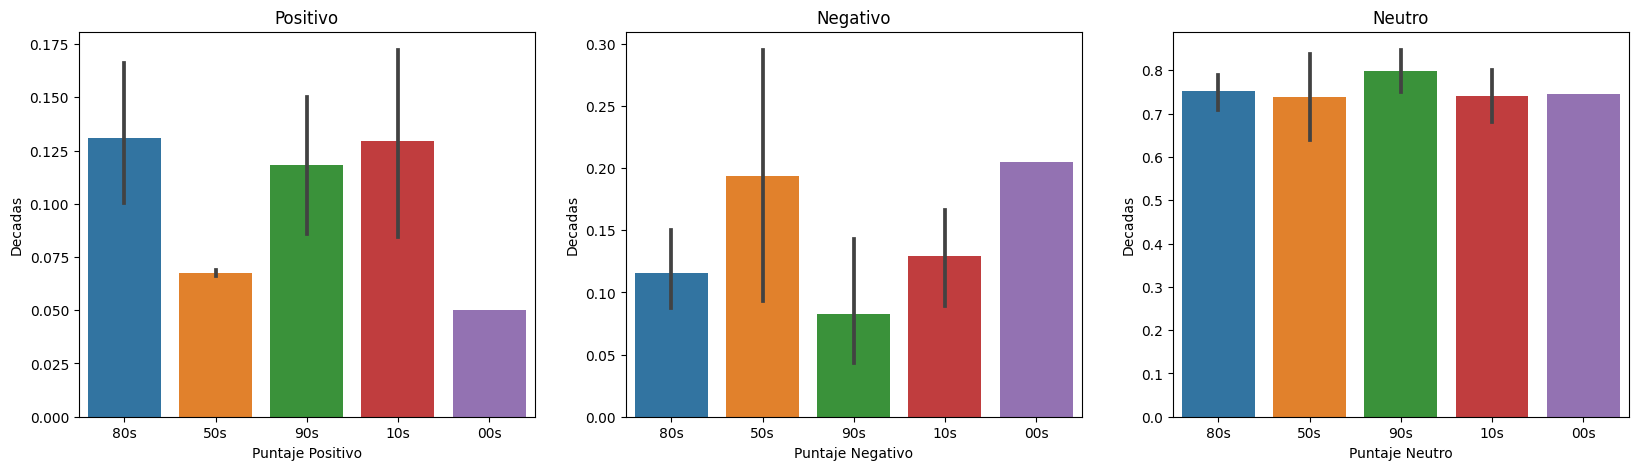

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(data=df, x='decade', y='vader_positive', ax=axs[0])
sns.barplot(data=df, x='decade', y='vader_negative', ax=axs[1])
sns.barplot(data=df, x='decade', y='vader_neutral', ax=axs[2])

axs[0].set_title('Positivo')
axs[0].set_xlabel('Puntaje Positivo')
axs[0].set_ylabel('Decadas')

axs[1].set_title('Negativo')
axs[1].set_xlabel('Puntaje Negativo')
axs[1].set_ylabel('Decadas')

axs[2].set_title('Neutro')
axs[2].set_xlabel('Puntaje Neutro')
axs[2].set_ylabel('Decadas')

Sentimientos promedio de las canciones clasificados por dacada

In [84]:
means_df = df.groupby(['decade']).mean(numeric_only=False)
means_df


C:\Users\oiram\AppData\Local\Temp\ipykernel_13948\258053506.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  means_df = df.groupby(['decade']).mean(numeric_only=False)


,date,negative,neutral,positive,compound,roberta_negative,roberta_neutral,roberta_positive,vader_negative,vader_neutral,vader_positive,vader_compound
decade,,,,,,,,,,,,
00s,2004.000000,0.205000,0.745000,0.050000,-0.991200,0.292342,0.607278,0.100380,0.205000,0.745000,0.050000,-0.991200
10s,2021.636364,0.129000,0.741364,0.129636,0.079073,0.311896,0.536027,0.152078,0.129000,0.741364,0.129636,0.079073
50s,1950.000000,0.194000,0.738500,0.067500,-0.841250,0.617090,0.339373,0.043538,0.194000,0.738500,0.067500,-0.841250
80s,1985.333333,0.115633,0.753333,0.131033,0.099063,0.291332,0.444719,0.163949,0.115633,0.753333,0.131033,0.099063
90s,1993.333333,0.082833,0.799000,0.118000,0.474617,0.358577,0.524613,0.116810,0.082833,0.799000,0.118000,0.474617


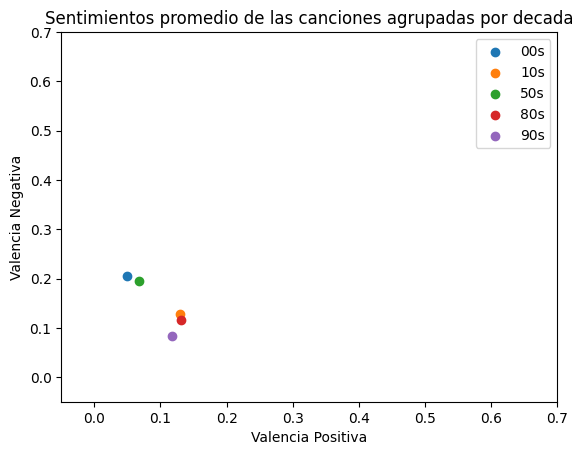

In [85]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['vader_positive'],group['vader_negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Sentimientos promedio de las canciones agrupadas por decada")
plt.xlabel('Valencia Positiva')
plt.ylabel('Valencia Negativa')

plt.show()


## Análisis de sentimiento utilizando el modelo pre entrenado ROBERTA

In [63]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Importamos el modelo pre entrenado Roberta

In [64]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\oiram\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Definimos una función auxiliar que nos permitirá calcular los scores utilizando el modelo Roberta

In [65]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

Calculamos los scores

In [71]:
#Crea listas para almacenar las diferentes puntuaciones de cada palabra
r_negative = []
r_neutral = []
r_positive = []


#Iterar sobre cada fila de letras y agregar las puntuaciones
for i in df.index:
    try:
        scores = polarity_scores_roberta(df['lyric'].iloc[i])
        r_negative.append(scores['roberta_neg'])
        r_neutral.append(scores['roberta_neu'])
        r_positive.append(scores['roberta_pos'])
    except RuntimeError:
        r_negative.append(0)
        r_neutral.append(0)
        r_positive.append(0)
        print(f"Broke for id {i}")

#Crea 4 columnas en el marco de datos principal para cada puntaje

Broke for id 3
Broke for id 4
Broke for id 22


In [73]:
df['roberta_negative'] = r_negative
df['roberta_neutral'] = r_neutral
df['roberta_positive'] = r_positive

Comparamos los scores calculados por el modelo Vader y Roberta

In [86]:
df[['title', 'decade', 'vader_negative', 'vader_positive', 'vader_neutral', 'vader_compound', 'roberta_negative','roberta_positive', 'roberta_neutral']].head()

,title,decade,vader_negative,vader_positive,vader_neutral,vader_compound,roberta_negative,roberta_positive,roberta_neutral
0,Everybody Wants to Rule the World,80s,0.062,0.183,0.755,0.9793,0.229869,0.294062,0.476069
1,Mad World,80s,0.242,0.135,0.622,-0.9864,0.290412,0.332036,0.377551
2,Head Over Heels/Broken (Reprise),50s,0.093,0.069,0.838,-0.6885,0.508544,0.062415,0.429041
3,Shout,80s,0.018,0.087,0.896,0.9869,0.000000,0.000000,0.000000
4,Sowing the Seeds of Love,80s,0.035,0.315,0.650,0.9998,0.000000,0.000000,0.000000


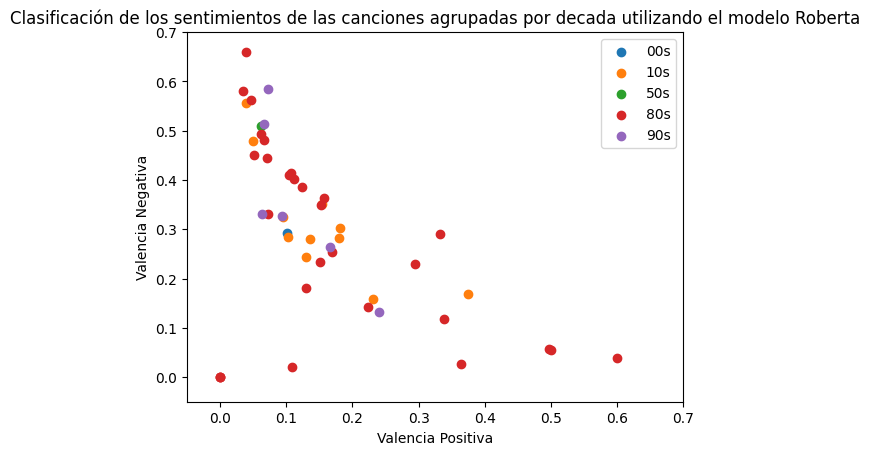

In [75]:
for name, group in df.groupby('decade'):
    plt.scatter(group['roberta_positive'],group['roberta_negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Clasificación de los sentimientos de las canciones agrupadas por decada utilizando el modelo Roberta")
plt.xlabel('Valencia Positiva')
plt.ylabel('Valencia Negativa')
plt.show()

Text(0, 0.5, 'Decadas')

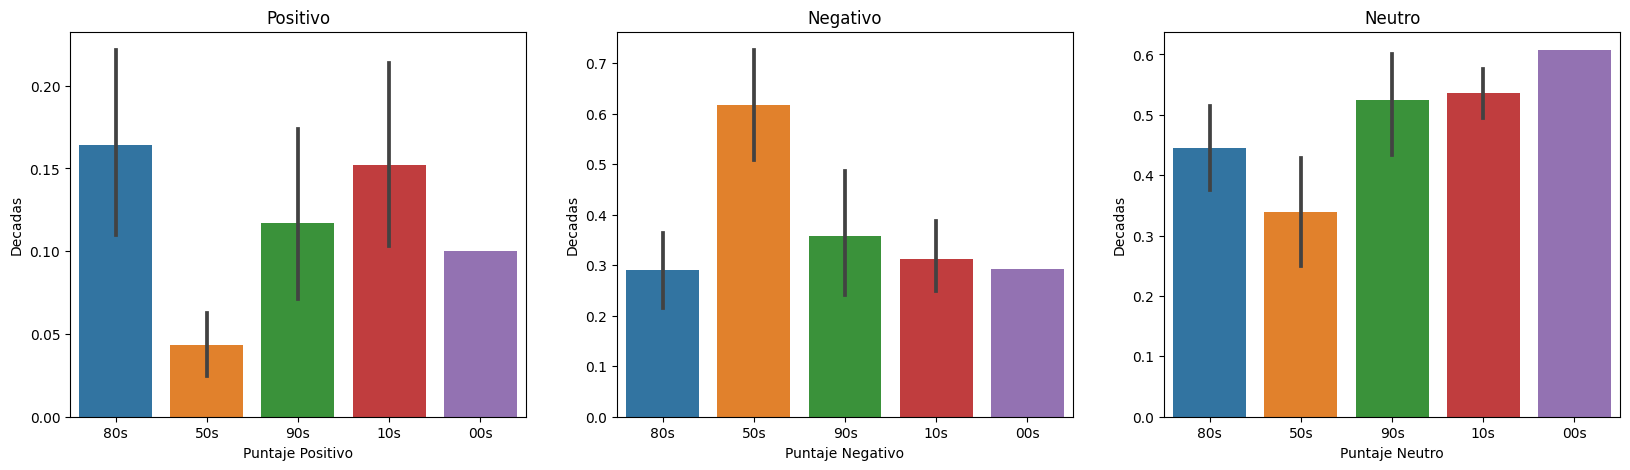

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(data=df, x='decade', y='roberta_positive', ax=axs[0])
sns.barplot(data=df, x='decade', y='roberta_negative', ax=axs[1])
sns.barplot(data=df, x='decade', y='roberta_neutral', ax=axs[2])

axs[0].set_title('Roberta Positivo')
axs[0].set_xlabel('Puntaje Positivo')
axs[0].set_ylabel('Decadas')

axs[1].set_title('Roberta Negativo')
axs[1].set_xlabel('Puntaje Negativo')
axs[1].set_ylabel('Decadas')

axs[2].set_title('Roberta Neutro')
axs[2].set_xlabel('Puntaje Neutro')
axs[2].set_ylabel('Decadas')

Sentimientos promedio de las canciones clasificadas por el modelo Roberta

In [77]:
means_df = df.groupby(['decade']).mean(numeric_only=False)
means_df.to_csv(f"data/df_{artist}.csv")
means_df

C:\Users\oiram\AppData\Local\Temp\ipykernel_13948\2708088430.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  means_df = df.groupby(['decade']).mean(numeric_only=False)


,date,negative,neutral,positive,compound,roberta_negative,roberta_neutral,roberta_positive
decade,,,,,,,,
00s,2004.000000,0.205000,0.745000,0.050000,-0.991200,0.292342,0.607278,0.100380
10s,2021.636364,0.129000,0.741364,0.129636,0.079073,0.311896,0.536027,0.152078
50s,1950.000000,0.194000,0.738500,0.067500,-0.841250,0.617090,0.339373,0.043538
80s,1985.333333,0.115633,0.753333,0.131033,0.099063,0.291332,0.444719,0.163949
90s,1993.333333,0.082833,0.799000,0.118000,0.474617,0.358577,0.524613,0.116810


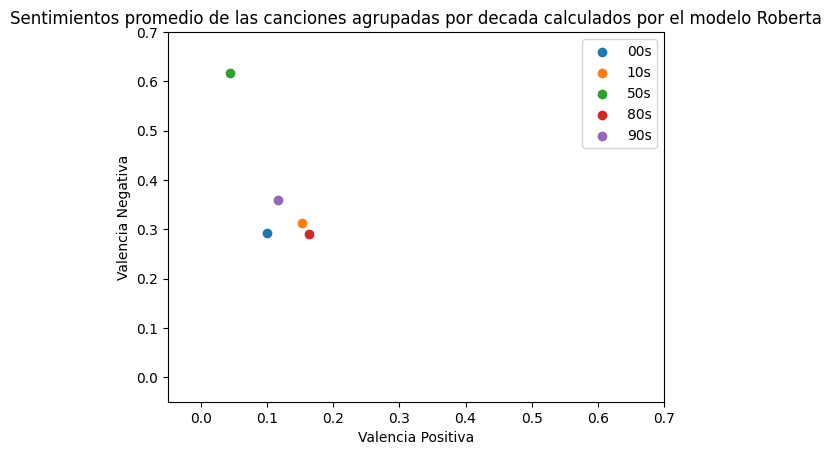

In [78]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['roberta_positive'],group['roberta_negative'],label=name)
    plt.legend()

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])
plt.title("Sentimientos promedio de las canciones agrupadas por decada calculados por el modelo Roberta")
plt.xlabel('Valencia Positiva')
plt.ylabel('Valencia Negativa')

plt.show()